## Plotting vertical intensity

### Step 1: Imports modules

In [1]:
import SimLight as sl
import SimLight.zernike as slz
import SimLight.plottools as slpl

SimLight 0.1.2



In [2]:
### Step 2: Configures the units and parameters

In [3]:
# units
m = 1
cm = 1e-2
mm = 1e-3
µm = 1e-6
nm = 1e-9
# parameters
wavelength = 0.550 * µm
size = 5 * mm
N = 50  # pixel number
f = 10 * mm
j = 15  # zernike orders
mag = 10
lflag = 'jl'  # language used in calculating 3D light field data

### Step 3: Generates light field, lens and zernike instances

In [4]:
F = sl.PlaneWave(wavelength, size, N)
L = sl.Lens.new_lens(size, f)
Z = slz.ZernikeCoefficients(j)
Z.coefficients[12] = 0.1  # spherical aberration

### Step 4: Plotting vertical intensity of none aberration

====== Calculating light fields ======
100.00% (250 / 250)
====== Padding to same size ======
100.00% (250 / 250) [500 => 13002]
====== Resizing to same pixels ======
100.00% (250 / 250) [13002 => 964]

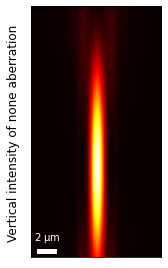

In [5]:
F1 = sl.circle_aperture(F)
F1, F1_3d = sl.near_field_propagation(F1, L, z=f, return_3d_field=True, coord='spherical', mag=mag, lflag=lflag)
slpl.plot_vertical_intensity(F1_3d, norm_type=1, mag=mag, title='Vertical intensity of none aberration')

### Step 5: Plotting vertical intensity of spherical aberration

====== Calculating light fields ======
100.00% (250 / 250)
====== Padding to same size ======
100.00% (250 / 250) [500 => 13002]
====== Resizing to same pixels ======
100.00% (250 / 250) [13002 => 964]

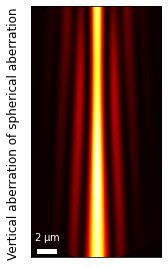

In [6]:
F2 = sl.aberration(F, Z)
F2 = sl.circle_aperture(F2)
F2, F2_3d = sl.near_field_propagation(F2, L, z=f, return_3d_field=True, coord='spherical', mag=mag, lflag=lflag)
slpl.plot_vertical_intensity(F2_3d, norm_type=1, mag=mag, title='Vertical aberration of spherical aberration')